## 3. CREDIT CARD FRAUD DETECTION

In [2]:
import pandas as pd
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Identifiying null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
for columns in df:
    print(f"({columns}:{df[columns].nunique()})")

(Time:124592)
(V1:275663)
(V2:275663)
(V3:275663)
(V4:275663)
(V5:275663)
(V6:275663)
(V7:275663)
(V8:275663)
(V9:275663)
(V10:275663)
(V11:275663)
(V12:275663)
(V13:275663)
(V14:275663)
(V15:275663)
(V16:275663)
(V17:275663)
(V18:275663)
(V19:275663)
(V20:275663)
(V21:275663)
(V22:275663)
(V23:275663)
(V24:275663)
(V25:275663)
(V26:275663)
(V27:275663)
(V28:275663)
(Amount:32767)
(Class:2)


In [5]:
#removing columns
df.drop(columns='Time', inplace=True)

In [6]:
#descibe numeric values
df.describe().T.style.background_gradient(cmap='Set2')

,count,mean,std,min,25%,50%,75%,max
V1,284807.000000,0.000000,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.000000,0.000000,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.000000,-0.000000,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.000000,0.000000,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.000000,0.000000,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.000000,0.000000,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.000000,-0.000000,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.000000,0.000000,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.000000,-0.000000,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995
V10,284807.000000,0.000000,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136


In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## Split

In [8]:
target='Class'
X=df.drop(columns='Class')
y=df[target]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(227845, 29)
(227845,)


## Over Sampling

In [37]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
ov=RandomOverSampler(random_state=42)
X_train_over,y_train_over=ov.fit_resample(X_train,y_train)
print(y_train_over.value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64


## Model ( Random Forest Classifier )

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
# Create a Random Forest Classifier instance
rf_classifier = RandomForestClassifier( random_state=42)  # You can adjust hyperparameters as needed

# Fit the classifier to the training data
rf_classifier.fit(X_train_over, y_train_over)


RandomForestClassifier(random_state=42)

In [40]:
y_pred=rf_classifier.predict(X_test)

In [56]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



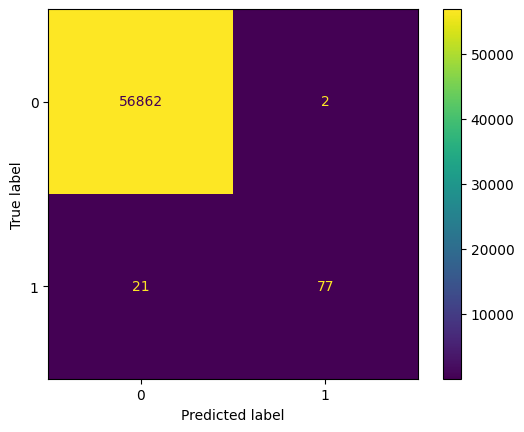

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_classifier,X_test,y_test)

## Model ( Feed Forward Neural Network )

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_over.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_over,y_train_over,epochs=5)


Epoch 1/5
14216/14216 [==============================] - 44s 3ms/step - loss: 0.1010 - accuracy: 0.9787
Epoch 2/5
14216/14216 [==============================] - 42s 3ms/step - loss: 0.0196 - accuracy: 0.9943
Epoch 3/5
14216/14216 [==============================] - 42s 3ms/step - loss: 0.0132 - accuracy: 0.9962
Epoch 4/5
14216/14216 [==============================] - 43s 3ms/step - loss: 0.0104 - accuracy: 0.9972
Epoch 5/5
14216/14216 [==============================] - 43s 3ms/step - loss: 0.0089 - accuracy: 0.9977


In [58]:
model.evaluate(X_test,y_test)

1781/1781 [==============================] - 4s 2ms/step - loss: 0.0183 - accuracy: 0.9954


[0.018313508480787277, 0.9953829050064087]

In [59]:
yp=[]
y_prediction=(model.predict(X_test))
for element in y_prediction:
    if element>0.5:
        yp.append(1)
    else:
        yp.append(0)

1781/1781 [==============================] - 2s 1ms/step


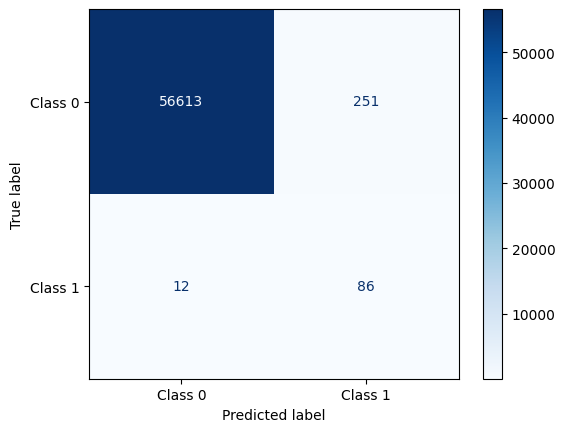

In [60]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, yp)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
display.plot(cmap=plt.cm.Blues, values_format="d")

In [61]:
# Generate a classification report
report = classification_report(y_test, yp)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.88      0.40        98

    accuracy                           1.00     56962
   macro avg       0.63      0.94      0.70     56962
weighted avg       1.00      1.00      1.00     56962



### The random forest classifier is performing well so It will perfer over F.F.N.N

In [ ]:
final_model = rf_classifier